# <center> Exploratory Data Analysis On The Movies Dataset

# Introduction

Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json


from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
#### load the movie dataset and create their dataframes
# loading all our data
movies_df = pd.read_csv("movies.csv")

# Viewing our data
movies_df.head()




,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [4]:
# Viewing all columns
movies_df.columns.tolist()

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [5]:
# Dropping columns irrelevant to investigaion
movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] , axis=1, inplace=True)

# Viewing to ensure columns have been dropped
movies_df.columns.tolist()

['budget',
 'genres',
 'id',
 'popularity',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'title',
 'vote_average',
 'vote_count']

#### Remove any duplicate rows

In [6]:
# Checking for duplicate rows
movies_df.duplicated(keep=False)

# Removing duplicate rows
movies_df.drop_duplicates()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [7]:
# Removing all zero budget or zero revenue entries
new_movies_df = movies_df.loc[(movies_df[['budget', 'revenue']] != 0).all(axis=1)]

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [8]:
# Change the release_date column to DateTime column
new_movies_df['release_date']= pd.to_datetime(new_movies_df['release_date'])
 
# Check the format of 'release_date' column
new_movies_df.info()

# Extract the release year from every release date into new column
new_movies_df['release_year'] = new_movies_df['release_date'].dt.year.apply(pd.to_numeric)


# Viewing our dataset
new_movies_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   release_date          3229 non-null   datetime64[ns]
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 327.9+ K

C:\Users\moona\AppData\Local\Temp\ipykernel_3552\518915215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_df['release_date']= pd.to_datetime(new_movies_df['release_date'])
C:\Users\moona\AppData\Local\Temp\ipykernel_3552\518915215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_df['release_year'] = new_movies_df['release_date'].dt.year.apply(pd.to_numeric)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [9]:
# changing format of 'budget' and 'revenue' to int64 type
new_movies_df['budget'] = new_movies_df['budget'].apply(np.int64)
new_movies_df['revenue'] = new_movies_df['revenue'].apply(np.int64)

# Check the types
new_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   release_date          3229 non-null   datetime64[ns]
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
 12  release_year          3229 non-null   int64         
dtypes: datetime64[ns](

C:\Users\moona\AppData\Local\Temp\ipykernel_3552\814982698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_df['budget'] = new_movies_df['budget'].apply(np.int64)
C:\Users\moona\AppData\Local\Temp\ipykernel_3552\814982698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_df['revenue'] = new_movies_df['revenue'].apply(np.int64)


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [10]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(new_movies_df.index,new_movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        new_movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

new_movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [11]:
# sorting column 'budget' in descending order
top_movies = new_movies_df.sort_values(by='budget', ascending=False)
top_movies.head()



,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


In [12]:
# sorting column 'budget' in ascending order
worst_movies = new_movies_df.sort_values(by='budget')
worst_movies.head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
4238,1,"['Drama', 'Comedy']",3082,28.276480,['United States of America'],1936-02-05,8500000,87.0,['English'],Modern Times,8.1,856,1936
3611,4,"['Drama', 'Romance', 'War']",22649,1.199451,['United States of America'],1932-12-08,25,89.0,['English'],A Farewell to Arms,6.2,28,1932
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Split Second,5.7,63,1992
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009
4608,8,"['Fantasy', 'Horror', 'Thriller']",11980,11.818333,['United States of America'],1995-09-01,16,98.0,['English'],The Prophecy,6.4,138,1995


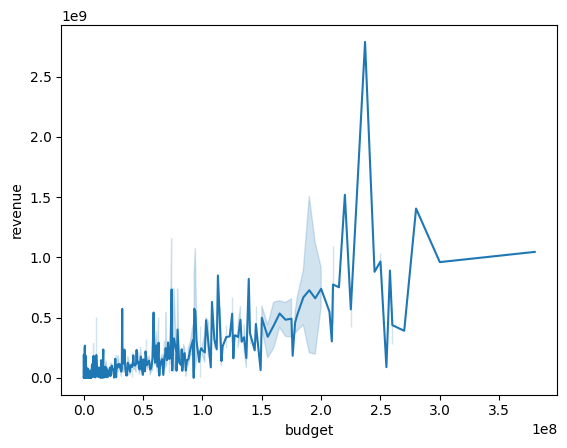

In [13]:
# producing a lineplot to compare 'budget' with 'revenue'
sns.lineplot(x='budget', y= 'revenue', data = new_movies_df);

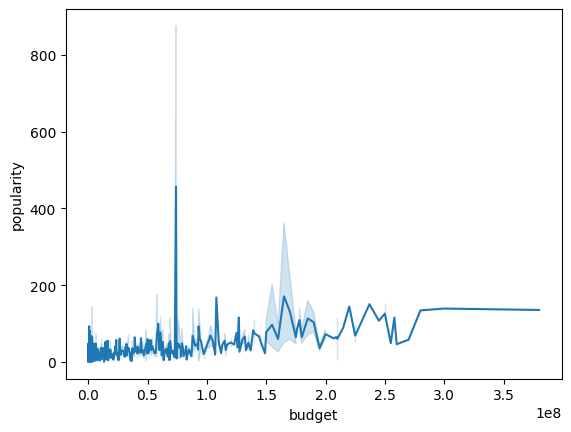

In [14]:
# producing a lineplot to compare 'budget' with 'popularity'
sns.lineplot(x='budget', y= 'popularity', data = new_movies_df);

The five most expensive films were;

1. Pirates of the Caribbean: On Stranger Tides

2. Pirates of the Caribbean: At World's End

3. Avengers: Age of Ultron

4. Superman Returns

5. John Carte

The first graph compares the 'budget' with the 'revenue'. You can see that there is a positive correlation between how expensive a movie is and how much revenue it generates. However, ignoring the few outliers this is a shallow and tentative relationship.

The second graph compares the budget with the performance of the film, in terms of how popular it was with the audience. This shows 
that the budget has no significant relationship with how popular a film is with the audience. In fact the most popular film was in the lower quartile for budget.

From these two graphs we can infer that a more expenisve budget does tend to generate higher revenue, however as it does not affect popularity we would need to investigate further and consider which factors relate to how much profit a film makes.

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [15]:
#calculating Profit for each movie
#add a new column in the dataframe name 'profit'
new_movies_df['profit'] = new_movies_df['revenue'] - new_movies_df['budget']
new_movies_df.head()




C:\Users\moona\AppData\Local\Temp\ipykernel_3552\2953310486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_df['profit'] = new_movies_df['revenue'] - new_movies_df['budget']


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007,661000000
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015,635674609
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012,24139100


In [16]:
top_profit = new_movies_df.sort_values(by='profit', ascending=False)
top_profit



,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,100000000,"['Action', 'Comedy', 'Science Fiction']",11692,12.092241,"['Australia', 'United States of America']",2002-08-15,7103973,95.0,['English'],The Adventures of Pluto Nash,4.4,142,2002,-92896027
208,160000000,"['Adventure', 'Fantasy', 'Action']",1911,27.220157,['United States of America'],1999-08-27,61698899,102.0,"['English', 'Norsk']",The 13th Warrior,6.4,510,1999,-98301101
141,150000000,"['Adventure', 'Animation', 'Family']",50321,12.362599,['United States of America'],2011-03-09,38992758,88.0,['English'],Mars Needs Moms,5.5,199,2011,-111007242
338,145000000,"['Western', 'History', 'War']",10733,10.660441,['United States of America'],2004-04-07,25819961,137.0,"['English', 'Español']",The Alamo,5.8,106,2004,-119180039


The five top profitable films are;

1. Avatar

2. Titanic

3. Jurassic World	

4. Furious 7

5. The Avengers

The movie with the highest profit was 'Avatar' with a profit of : 2550965087

The movie with the lowest profit was 'The Lone Ranger' which made a loss of : 165710090

Trying to understand why some movies are more profitable than others provides valuable insight when producing a movie.


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [17]:
# sorting column 'popularity' in descending order
most_pop_movies = new_movies_df.sort_values(by='popularity', ascending=False)
most_pop_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


#### Find Movies which are rated above 7



In [18]:
# Finding movies rated above 7
new_movies_df[(new_movies_df['vote_average'] > 7)]


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,2009,683959197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,6706368,91.0,['English'],Roger & Me,7.4,90,1989,6546368
4724,10000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,7000000,89.0,['English'],Eraserhead,7.5,485,1977,6990000
4738,60000,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,3221152,84.0,['English'],Pi,7.1,586,1998,3161152
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994,3124130


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

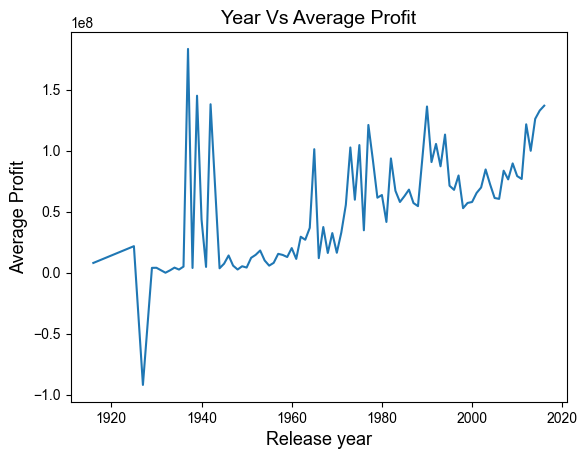

In [19]:
# Taking the average profit of movies for each year and producing plot
new_movies_df.groupby('release_year')['profit'].mean().plot()

# Adding labels
plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

# Setting up figure parameters.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")



From the graph we can see that, on average, the most profitable movies was around 1937.

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [20]:
genre_join = new_movies_df['genres'].str.cat()
data = pd.Series(genre_join.replace('][', ', ').split(', '))
data = data.replace('[', ' ')
data = data[1:-1]
count = data.value_counts(ascending=False)
count

'Drama'              1441
'Comedy'             1110
'Thriller'            934
'Action'              917
'Adventure'           661
'Romance'             574
'Crime'               521
'Science Fiction'     431
'Family'              365
'Fantasy'             342
'Horror'              332
'Mystery'             265
'Animation'           188
'History'             145
'War'                 120
'Music'               111
'Western'              57
'Documentary'          38
'Foreign'               5
                        1
dtype: int64

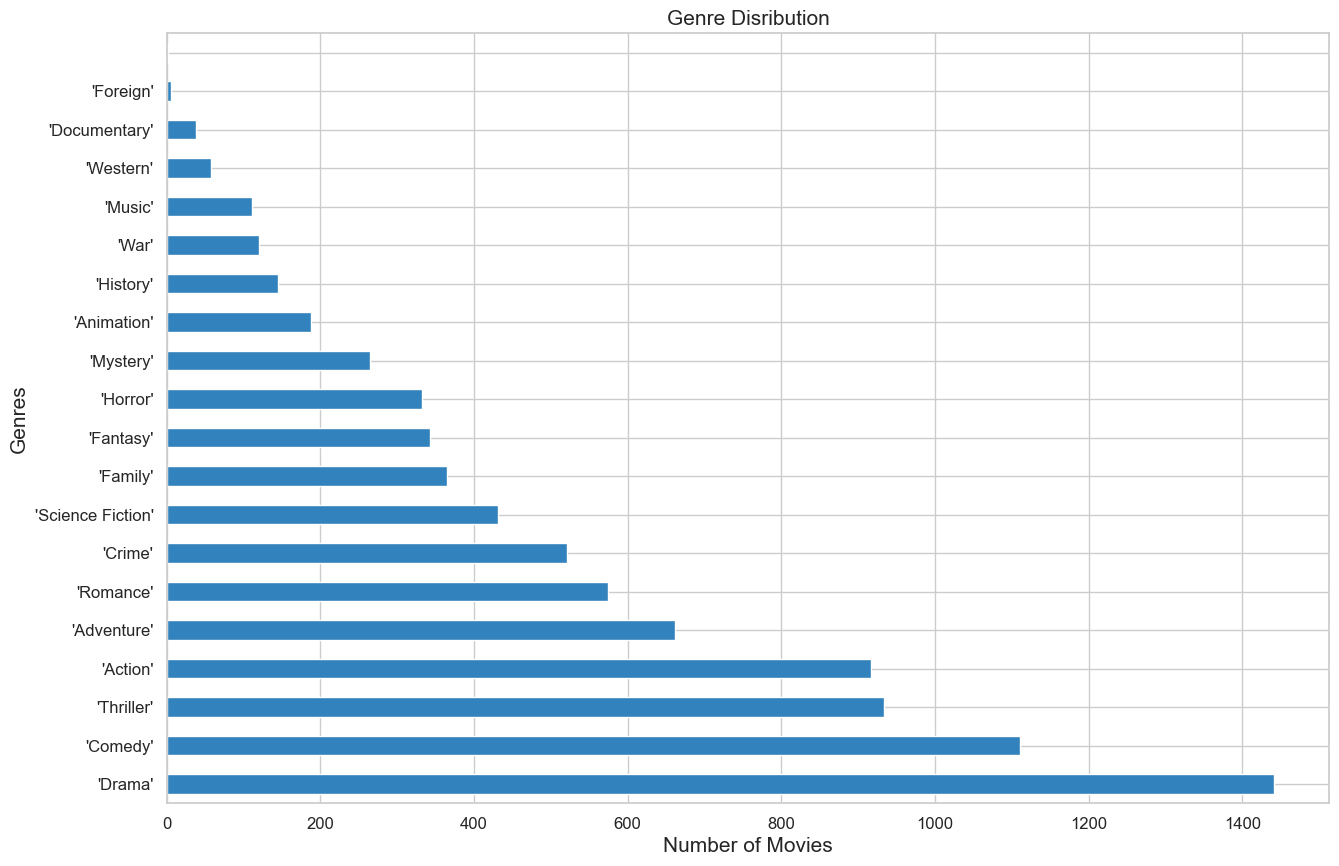

In [77]:
count.plot(kind= 'barh',figsize = (15,10),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre Disribution",fontsize=15)
plt.xlabel('Number of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15)
sns.set_style("whitegrid")

To investigate why some movies are more profitable than others we will analyse some visuals to see how different variables relate to the profit a movie makes to gain deeper understanding.

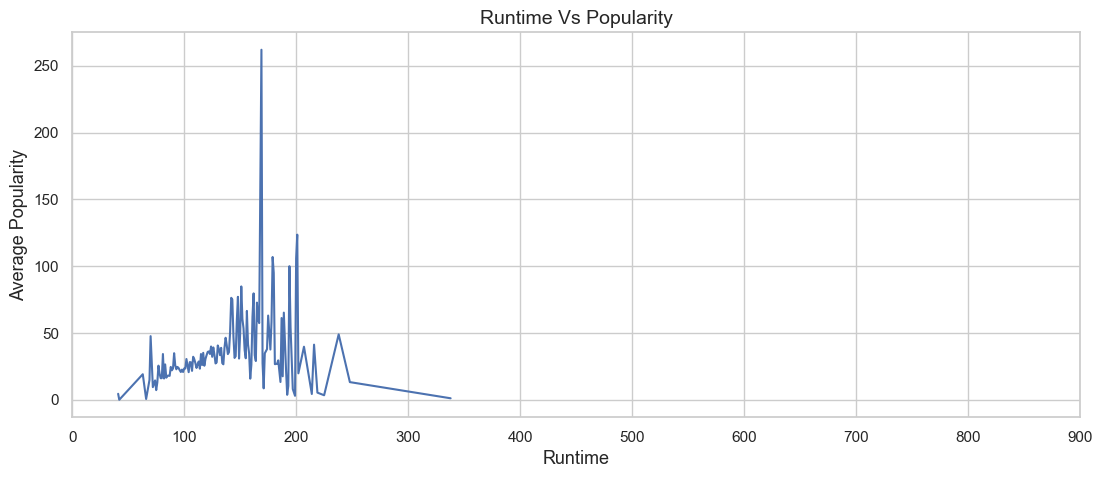

In [78]:
#genre profit 

new_movies_df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")







The most popular runtime is beween 150 - 200. This could be because movies longer than that can become boring or cumbersome to watch. Any shorter than 150 could mean that the movies lacked depth or the viewer felt they were not getting their monies worth.

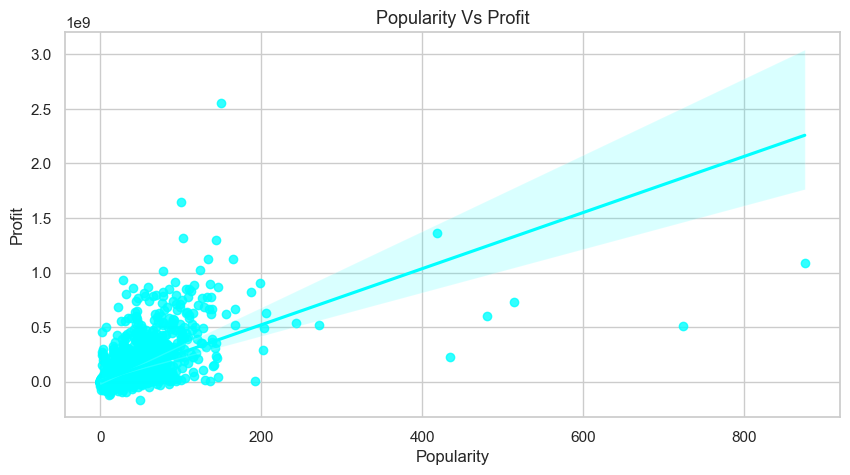

In [79]:
sns.regplot(x=new_movies_df['popularity'],y=new_movies_df['profit'],color='cyan')

#setup the title and the labels of the scatter plot.
plt.title("Popularity Vs Profit",fontsize=13)
plt.xlabel("Popularity",fontsize=12)
plt.ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")


There is a positive correlation between popularity and profit. This provides valuable insight as movie produced can use the analysis of other variables that are related to profit, such as the runtime we explored earlier, to gain a deeper understanding how to generate greater revenue.

C:\Users\moona\AppData\Local\Temp\ipykernel_14688\1675729605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_movies_df.corr()


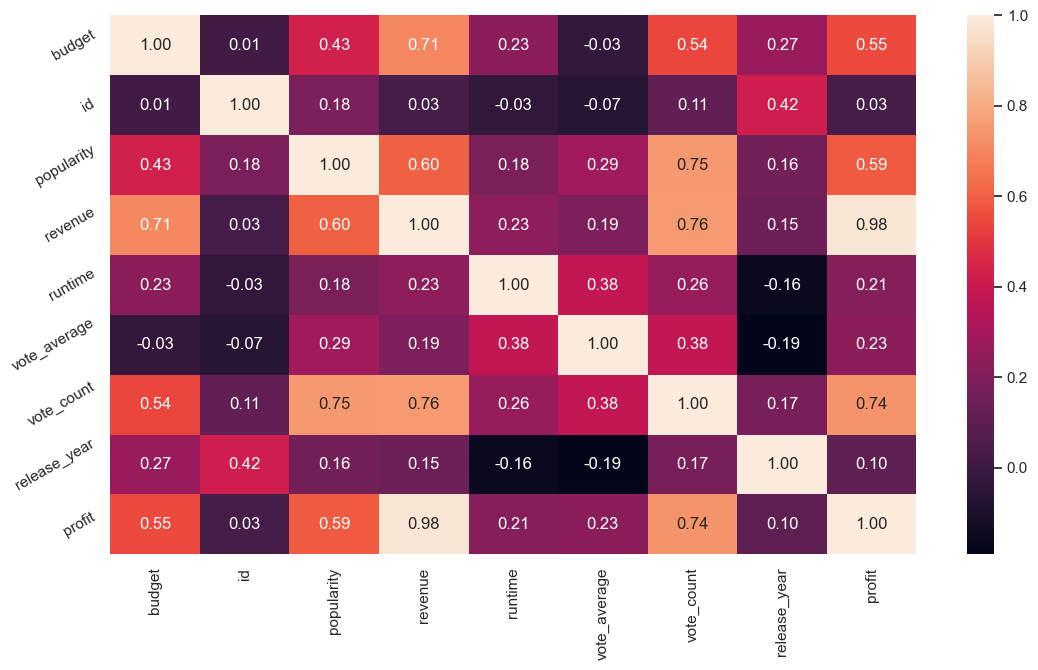

In [80]:
corr = new_movies_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


A correlation heat map is a great way to visualise how all the variables relate with each oher. We have already established that the popularity of a movie has a positive correlation with how much profit the movie makes. We can use the heatmap as a guide to see what oher variables relate to popularity and profit so that we may investigate further.

For instance budget and vote_count have positive correlations with both popularity and profit. whilst the year the movie was released has very little correlation with a value of 0.1.

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)